In [2]:
import anndata
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import numpy as np
import pandas as pd
import scipy.stats
import diffxpy.api as de
de.__version__

'v0.7.1'

In [3]:
from batchglm.api.models.tf1.glm_nb import Simulator

sim = Simulator(num_observations=200, num_features=100)
sim.generate_sample_description(num_batches=0, num_conditions=2)
sim.generate_params(
    rand_fn_loc=lambda shape: np.random.uniform(-0.1, 0.1, shape),
    rand_fn_scale=lambda shape: np.random.uniform(0.1, 2, shape)
)
sim.generate_data()

data = anndata.AnnData(
    X=sim.x,
    var=pd.DataFrame(index=["gene" + str(i) for i in range(sim.x.shape[1])]),
    obs=sim.sample_description
)

In [4]:
test = de.test.wald(
    data=data,
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition"
)

In [5]:
test.summary().iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,gene0,0.695783,0.893638,-0.017901,475.970001,False,0.002143,-0.017901,0.045780,-1283.903307
1,gene1,0.415175,0.736090,-0.065297,476.760010,False,0.078950,-0.065297,0.080137,-1392.060355
2,gene2,0.868021,0.980151,-0.009092,530.140015,False,0.009169,-0.009092,0.054714,-1336.670666
3,gene3,0.314413,0.729632,0.043800,520.405029,False,0.031736,0.043800,0.043538,-1298.717103
4,gene4,0.321038,0.729632,-0.071615,446.325012,False,0.031453,-0.071615,0.072169,-1355.714920
5,gene5,0.709442,0.893638,0.040698,572.344971,False,0.002276,0.040698,0.109225,-1456.054209
6,gene6,0.933707,0.980151,0.007614,457.049988,False,0.007217,0.007614,0.091535,-1390.131514
7,gene7,0.315665,0.729632,0.071112,468.894989,False,0.072637,0.071112,0.070871,-1368.964127
8,gene8,0.970897,0.980704,0.002037,515.534973,False,0.030750,0.002037,0.055825,-1341.586923
9,gene9,0.426932,0.736090,-0.051337,442.855011,False,0.027551,-0.051337,0.064620,-1335.731664


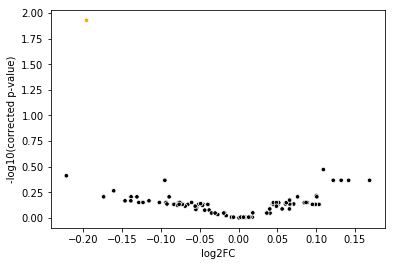

In [6]:
test.plot_volcano(corrected_pval=True, min_fc=1.05, alpha=0.05, size=20)